In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the file
Data= pd.read_csv('Advertisement.csv')

In [3]:
Data.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
Data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

About Columns:

1.Unnmaed:0 It is the serial number of each row.

2.TV: Television, A box which shows moving pictures, at 1st it was black and white, now there are color TV's.

3.Radio: The transmission and reception of electromagnetic waves of radio frequency, especially those carrying sound messages.

4.Newspaper: A printed paper of certain publication, consisting of folded unstaped sheets and containing news, articles, advertisements and correspondence.

5.Sales: The exchange of a commodity for money, the action of selling something.

Here Unnamed: 0 is the serial number column, which we can drop, as it is not affecting our dataset.

In [5]:
Data.drop(['Unnamed: 0'] , axis=1, inplace=True)

In [6]:
Data.sample(10)

,TV,radio,newspaper,sales
75,16.9,43.7,89.4,8.7
98,289.7,42.3,51.2,25.4
13,97.5,7.6,7.2,9.7
87,110.7,40.6,63.2,16.0
158,11.7,36.9,45.2,7.3
16,67.8,36.6,114.0,12.5
35,290.7,4.1,8.5,12.8
65,69.0,9.3,0.9,9.3
84,213.5,43.0,33.8,21.7
15,195.4,47.7,52.9,22.4


In [7]:
# Checking the null values
Data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

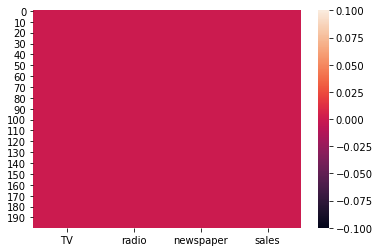

In [8]:
sns.heatmap(Data.isnull())

As per the heatmap there is no null values are in Dataset.

In [9]:
Data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [10]:
Data=pd.DataFrame(data=Data)

In [11]:
Data.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [12]:
Data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [13]:
Data.shape

(200, 4)

There are 200 Rows with 4 Columns in which sales is label else other columns are Feature(TV,radio,newspaper,sales)

In [14]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# EDA

In [15]:
Data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

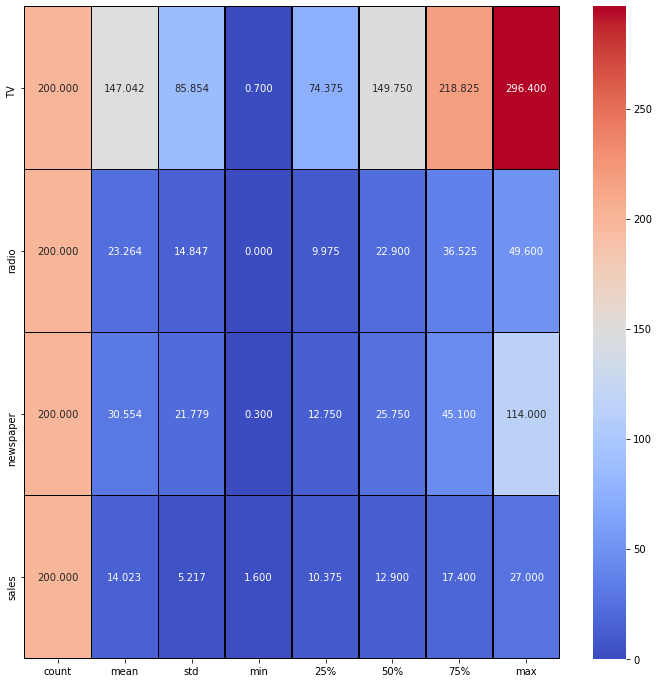

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(Data.describe().transpose(), annot=True, fmt='0.3f', linecolor='black', linewidths=0.2, cmap='coolwarm')

Some of the observations from heatmap of Discription:
1:~ from the newspaper column there is a bigger difference between mean and 50% so data is skewed.
2:~ in newspaper column there is big difference between 75% and MAX so outliers are present there.
3:~ the std of TV,radio and newspaper is high which illustrates that outliers are present.


Genral observation:
outcome of describe of datasets:

From above we are determining mean, standard deviation, min. and max. value of each column, which will furthur help in data cleaning.

Total number of rows and columns in dataset:

1=200 rows
2=4 columns

TV:

1.Mean=147.04

2.std.=85.85

3.max_value=296.40

4.min_value=0.70

radio:

1.Mean=23.26

2.std.=14.85

3.max_value=49.60

4.min_value=0.00

newspaper:

1.Mean=30.55

2.std.=21.78

3.max_value=114.00

4.min_value=0.30

sales:

1.Mean=14.02

2.std.=5.22

3.max_value=27.00

4.min_value=1.60

sales is our target column.


In [17]:
#checking for correlaions

Data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Text(0.5, 1.0, 'Correaltion metrix')

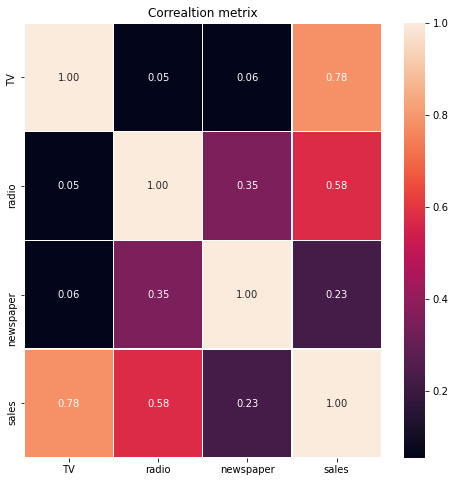

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(Data.corr(), annot=True, fmt='0.2f', linecolor='white', linewidths=0.2)
plt.title('Correaltion metrix')

As per the observation from Correlation metrix:
TV is showing highly correlation with Sales which is followed by radio and newspaper 0.78,0.58 and 0.23 respectively.
TV and radio is also showing some good correlation.

# Checking for Outliers

<AxesSubplot:ylabel='newspaper'>

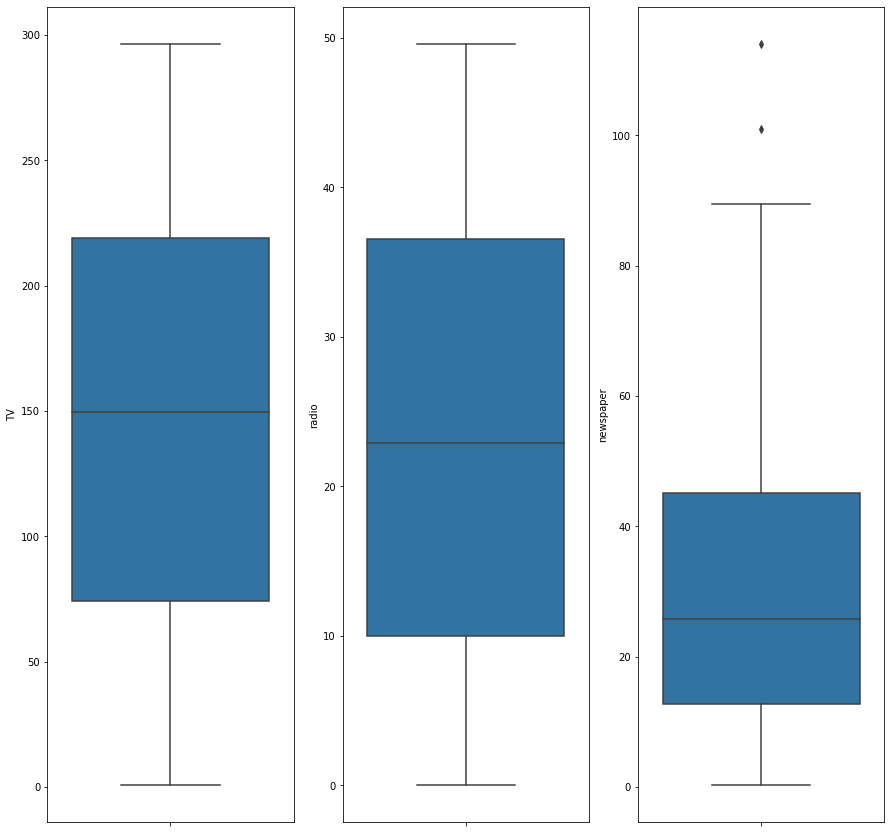

In [19]:
fig,axes= plt.subplots(1,3,figsize = (15,15))
sns.boxplot(y=Data['TV'], ax = axes[0])
sns.boxplot(y=Data['radio'],ax =axes[1])
sns.boxplot(y=Data['newspaper'], ax=axes[2])

# As is seen from Box plot there are  outliers present in coloumn of newspaper.


<AxesSubplot:>

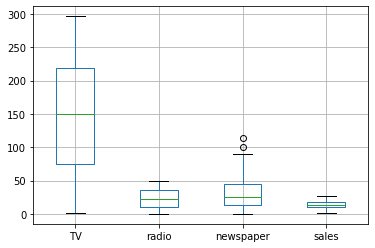

In [20]:
Data.boxplot()

# Checking for the skewness

In [21]:
Data.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

While considering the threshold of +/- 0.5 only the data of newspaper is showing skewness.

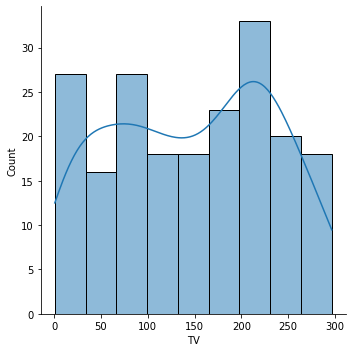

In [22]:
sns.displot(Data['TV'], kde= True)

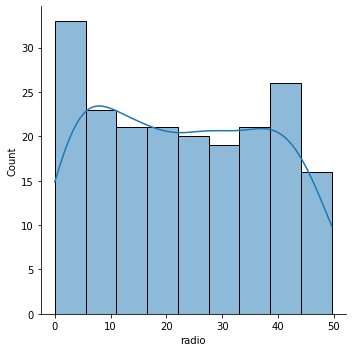

In [23]:
sns.displot(Data['radio'], kde= True)

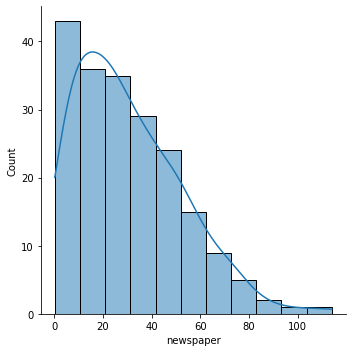

In [24]:
sns.displot(Data['newspaper'], kde=True)

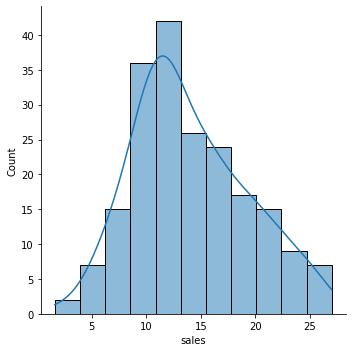

In [25]:
sns.displot(Data['sales'], kde= True)

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>],
       [<AxesSubplot:title={'center':'newspaper'}>,
        <AxesSubplot:title={'center':'sales'}>]], dtype=object)

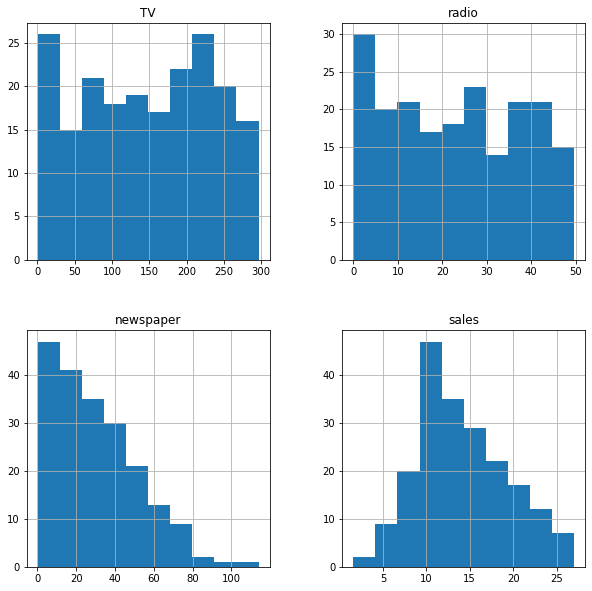

In [26]:
# Mutlivariate Analysis
Data.hist(figsize=(10,10))



# Removing the outliers using Zscore

In [27]:
# calling Zscore 
from scipy.stats import zscore
z= np.abs(zscore(Data))

In [28]:
z.shape

(200, 4)

In [29]:
threshold =3 
print(np.where(z>3))

(array([ 16, 101]), array([2, 2]))


In [30]:
Data_new= Data[(z<3).all(axis=1)]

In [31]:
Data_new.shape

(198, 4)

In [32]:
# percentage of Data Loss
Data_loss= ((200-198)/200)*100
Data_loss

1.0

while the data loss is less then 5% so we use the now data data set Data_new for further analysis because it has no outliers and zsore of standard deviation is less then 3.

# Removing the skewness 

In [33]:
x = Data_new.drop('sales' , axis=1)
y=Data_new['sales']

In [34]:
print(x.shape)
print(y.shape)

(198, 3)
(198,)


for skewness we will use power transform and then use Standard scaler.

In [35]:
# calling the power transform and Standard Scaler
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
x= power_transform(x)
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

In [36]:
# apply standard scaler
sc= StandardScaler()
sc.fit_transform(x)
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

In [37]:
Data_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [38]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [39]:
y.value_counts()

9.7     5
15.9    4
11.7    4
12.9    4
20.7    3
       ..
21.7    1
14.5    1
21.2    1
22.1    1
20.8    1
Name: sales, Length: 121, dtype: int64

# Model selection and train test split

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

In [41]:
# finding out the best Randon state

Maxaccu=0
Maxrs=0

for i in range(1,1000):
    train_x,test_x,train_y,test_y= train_test_split(x,y, random_state=i , test_size=0.20)
    lr= LinearRegression()
    lr.fit(train_x,train_y)
    pred_train_lr= lr.predict(train_x)
    pred_test_lr=lr.predict(test_x)
    accuracy = r2_score(test_y,pred_test_lr)
    if Maxaccu<accuracy:
        Maxaccu=accuracy
        Maxrs=i
print('the highest accuracy is ',Maxaccu,'at the random state', Maxrs)

the highest accuracy is  0.9485659106556623 at the random state 209


# The best random state is 209 at which the accuracy is 95%.

# finding the best model 

In [42]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

lr =LinearRegression()
sg = SGDRegressor()
dt= DecisionTreeRegressor()
et= ExtraTreeRegressor()
rf= RandomForestRegressor()
ar= AdaBoostRegressor()
gb= GradientBoostingRegressor()
svr= SVR()
knr= KNeighborsRegressor()
br =BaggingRegressor()

models= [lr,sg,dt,et,rf,ar,gb,svr,knr,br]
for i in models:
    i.fit(train_x,train_y)
    pred_i= i.predict(test_x)
    print('==========================',i,'=============================')
    print('the train score of ',i,'is',i.score(train_x,train_y))
    print('the test score of ', i , 'is', i.score(test_x,test_y))
    print('the r2 score of ', i , 'is ', r2_score(test_y,pred_i))
    print('/n')
    
    



========================== LinearRegression() =============================
the train score of  LinearRegression() is 0.9054258989842197
the test score of  LinearRegression() is 0.9028367967872094
the r2 score of  LinearRegression() is  0.9028367967872094
/n
========================== SGDRegressor() =============================
the train score of  SGDRegressor() is 0.9053889878599011
the test score of  SGDRegressor() is 0.903132927589574
the r2 score of  SGDRegressor() is  0.903132927589574
/n
========================== DecisionTreeRegressor() =============================
the train score of  DecisionTreeRegressor() is 1.0
the test score of  DecisionTreeRegressor() is 0.9697012134487858
the r2 score of  DecisionTreeRegressor() is  0.9697012134487858
/n
========================== ExtraTreeRegressor() =============================
the train score of  ExtraTreeRegressor() is 1.0
the test score of  ExtraTreeRegressor() is 0.9642668090005011
the r2 score of  ExtraTreeRegressor() is  0.9642

# As observed in all the models RandomforestRegressor is working with highest R2_score with 99%. to avoid the overftting we will go further and check for Cross_validation score.

In [43]:
# checking for the Cross_validation score

from sklearn.model_selection import cross_val_score

models= [lr,sg,dt,et,rf,ar,gb,svr,knr,br]

for m in models:
    cross_val_m=cross_val_score(m,x,y,cv=5)
    print('the cross validation score of ', m, 'is',cross_val_m.mean()*100)
    print('the  r2score of' , m, 'is', r2_score(test_y,pred_i)*100 )
    print('\n')

the cross validation score of  LinearRegression() is 89.5827096855507
the  r2score of LinearRegression() is 98.60504034406739


the cross validation score of  SGDRegressor() is 89.627025134632
the  r2score of SGDRegressor() is 98.60504034406739


the cross validation score of  DecisionTreeRegressor() is 95.32013212654124
the  r2score of DecisionTreeRegressor() is 98.60504034406739


the cross validation score of  ExtraTreeRegressor() is 95.51644661309744
the  r2score of ExtraTreeRegressor() is 98.60504034406739


the cross validation score of  RandomForestRegressor() is 97.72570029263443
the  r2score of RandomForestRegressor() is 98.60504034406739


the cross validation score of  AdaBoostRegressor() is 95.47406545384753
the  r2score of AdaBoostRegressor() is 98.60504034406739


the cross validation score of  GradientBoostingRegressor() is 97.82811517359852
the  r2score of GradientBoostingRegressor() is 98.60504034406739


the cross validation score of  SVR() is 92.02978192122427
the  r

# As the observation RandomForestRegressor is having highest Accuracy and Cross validation score with 98%. so will choose this model. it also shows the least difference between R2 score and cross validation score.

# Hyper Parameter Tuning:

In [47]:
from sklearn.model_selection import GridSearchCV
# getting the parameter for Randomforest Regressor
parameter= {'max_depth': np.arange(2,10),
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': np.arange(2,20)}


In [52]:
Gcv= GridSearchCV(RandomForestRegressor(),parameter,cv=5)
Gcv.fit(train_x,train_y)
Gcv.best_params_


{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 19}

In [54]:
Gcv_pred= Gcv.best_estimator_.predict(test_x)  # comparing the GCV with Actual Accuracy
r2_score(test_y,Gcv_pred)


0.9917712674333612

# The final accuracy is 99%.

In [56]:
# Saving the current model
import joblib
joblib.dump(Gcv.best_estimator_,(' Advertising Sales Channel Prediction.pk1'))

[' Advertising Sales Channel Prediction.pk1']

In [60]:
import numpy as np
a = np.array(test_y)
b=np.array(rf.predict(test_x))


In [61]:
New= pd.DataFrame({'original':a, 'predicted':b})

In [62]:
New

,original,predicted
0,20.2,20.063
1,12.4,11.672
2,11.9,12.069
3,12.8,12.405
4,12.2,11.805
5,13.2,12.661
6,26.2,25.091
7,15.0,14.398
8,5.7,5.291
9,16.0,16.006


Text(0, 0.5, 'Predicted Result')

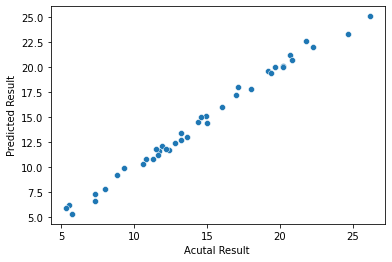

In [64]:
sns.scatterplot(x=a,y=b,data=New)
plt.xlabel('Acutal Result ')
plt.ylabel('Predicted Result')